# Bike Sharing System Assignment

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## import libraries required

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('day.csv')
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


### derive 'windchill' and from the columns 'windspeed', 'hum' and 'temp'

In [8]:
data['windchill_index'] = (10 * data['windspeed']** 0.5 - data['windspeed'] + 10.5) * (33 - data['atemp'])

In [9]:
data['windchill_index']

0      482.159605
1      530.672027
2      815.339054
3      728.515016
4      718.555889
          ...    
725    768.679347
726    655.177796
727    647.998689
728    759.735990
729    705.733946
Name: windchill_index, Length: 730, dtype: float64

In [10]:
import statsmodels.api as sm

In [11]:
data.dteday = pd.to_datetime(data.dteday)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          730 non-null    int64         
 1   dteday           730 non-null    datetime64[ns]
 2   season           730 non-null    int64         
 3   yr               730 non-null    int64         
 4   mnth             730 non-null    int64         
 5   holiday          730 non-null    int64         
 6   weekday          730 non-null    int64         
 7   workingday       730 non-null    int64         
 8   weathersit       730 non-null    int64         
 9   temp             730 non-null    float64       
 10  atemp            730 non-null    float64       
 11  hum              730 non-null    float64       
 12  windspeed        730 non-null    float64       
 13  casual           730 non-null    int64         
 14  registered       730 non-null    int64    

In [13]:
def week(n):
    if n == 0:
        return 'Monday'
    elif n == 1:
        return 'Tuesday'
    elif n == 2:
        return 'Wednesday'
    elif n == 3:
        return 'Thursday'
    elif n == 4:
        return 'Friday'
    elif n == 5:
        return 'Saturday'
    elif n == 6:
        return 'Sunday'

In [14]:
data['weekday'] = data['weekday'].apply(week)

In [15]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windchill_index
0,1,2018-01-01,1,0,1,0,Sunday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,482.159605
1,2,2018-02-01,1,0,1,0,Monday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,530.672027
2,3,2018-03-01,1,0,1,0,Tuesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,815.339054
3,4,2018-04-01,1,0,1,0,Wednesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,728.515016
4,5,2018-05-01,1,0,1,0,Thursday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,718.555889


In [16]:
weekdays = pd.get_dummies(data['weekday'],drop_first = True)

In [17]:
weekdays

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [18]:
data = pd.concat([data,weekdays],axis=1)

In [19]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,windchill_index,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,1,0,1,0,Sunday,0,2,14.110847,...,331,654,985,482.159605,0,0,1,0,0,0
1,2,2018-02-01,1,0,1,0,Monday,0,2,14.902598,...,131,670,801,530.672027,1,0,0,0,0,0
2,3,2018-03-01,1,0,1,0,Tuesday,1,1,8.050924,...,120,1229,1349,815.339054,0,0,0,0,1,0
3,4,2018-04-01,1,0,1,0,Wednesday,1,1,8.200000,...,108,1454,1562,728.515016,0,0,0,0,0,1
4,5,2018-05-01,1,0,1,0,Thursday,1,1,9.305237,...,82,1518,1600,718.555889,0,0,0,1,0,0


In [20]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'windchill_index', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [21]:
data.shape

(730, 23)

In [22]:
def season_name(sns):
    if sns == 1:
        return 'Spring'
    elif sns == 2:
        return 'Summer'
    elif sns == 3:
        return 'Fall'
    elif sns == 4:
        return 'Winter'

In [23]:
data['season'] = data['season'].apply(season_name)

In [24]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,windchill_index,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,Spring,0,1,0,Sunday,0,2,14.110847,...,331,654,985,482.159605,0,0,1,0,0,0
1,2,2018-02-01,Spring,0,1,0,Monday,0,2,14.902598,...,131,670,801,530.672027,1,0,0,0,0,0
2,3,2018-03-01,Spring,0,1,0,Tuesday,1,1,8.050924,...,120,1229,1349,815.339054,0,0,0,0,1,0
3,4,2018-04-01,Spring,0,1,0,Wednesday,1,1,8.200000,...,108,1454,1562,728.515016,0,0,0,0,0,1
4,5,2018-05-01,Spring,0,1,0,Thursday,1,1,9.305237,...,82,1518,1600,718.555889,0,0,0,1,0,0


In [25]:
def months(mnth):
    if mnth == 1:
        return 'January'
    elif mnth == 2:
        return 'February'
    elif mnth == 3:
        return 'March'
    elif mnth == 4:
        return 'April'
    elif mnth == 5:
        return 'May'
    elif mnth == 6:
        return 'June'
    elif mnth == 7:
        return 'July'
    elif mnth == 8:
        return 'August'
    elif mnth == 9:
        return 'September'
    elif mnth == 10:
        return 'October'
    elif mnth == 11:
        return 'November'
    elif mnth == 12:
        return 'December'

In [26]:
data['mnth'] = data['mnth'].apply(months)

In [27]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,windchill_index,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,Spring,0,January,0,Sunday,0,2,14.110847,...,331,654,985,482.159605,0,0,1,0,0,0
1,2,2018-02-01,Spring,0,January,0,Monday,0,2,14.902598,...,131,670,801,530.672027,1,0,0,0,0,0
2,3,2018-03-01,Spring,0,January,0,Tuesday,1,1,8.050924,...,120,1229,1349,815.339054,0,0,0,0,1,0
3,4,2018-04-01,Spring,0,January,0,Wednesday,1,1,8.200000,...,108,1454,1562,728.515016,0,0,0,0,0,1
4,5,2018-05-01,Spring,0,January,0,Thursday,1,1,9.305237,...,82,1518,1600,718.555889,0,0,0,1,0,0


In [28]:
seasons_dummy = pd.get_dummies(data['season'],drop_first=True)

In [29]:
seasons_dummy

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [30]:
months_dummy = pd.get_dummies(data['mnth'],drop_first=True)

In [31]:
months_dummy

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [32]:
data = pd.concat([data,months_dummy],axis=1)

In [33]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,December,February,January,July,June,March,May,November,October,September
0,1,2018-01-01,Spring,0,January,0,Sunday,0,2,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,2018-02-01,Spring,0,January,0,Monday,0,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,2018-03-01,Spring,0,January,0,Tuesday,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,Spring,0,January,0,Wednesday,1,1,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,2018-05-01,Spring,0,January,0,Thursday,1,1,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [34]:
data = pd.concat([data,seasons_dummy],axis=1)

In [35]:
data.shape

(730, 37)

In [36]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,July,June,March,May,November,October,September,Spring,Summer,Winter
0,1,2018-01-01,Spring,0,January,0,Sunday,0,2,14.110847,...,0,0,0,0,0,0,0,1,0,0
1,2,2018-02-01,Spring,0,January,0,Monday,0,2,14.902598,...,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,Spring,0,January,0,Tuesday,1,1,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,Spring,0,January,0,Wednesday,1,1,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,Spring,0,January,0,Thursday,1,1,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          730 non-null    int64         
 1   dteday           730 non-null    datetime64[ns]
 2   season           730 non-null    object        
 3   yr               730 non-null    int64         
 4   mnth             730 non-null    object        
 5   holiday          730 non-null    int64         
 6   weekday          730 non-null    object        
 7   workingday       730 non-null    int64         
 8   weathersit       730 non-null    int64         
 9   temp             730 non-null    float64       
 10  atemp            730 non-null    float64       
 11  hum              730 non-null    float64       
 12  windspeed        730 non-null    float64       
 13  casual           730 non-null    int64         
 14  registered       730 non-null    int64    

In [38]:
def weathersit_d(n):
    if n == 1:
        return 'weathersit_1'
    elif n == 2:
        return 'weathersit_2'
    elif n == 3:
        return 'weathersit_3'
    elif n == 4:
        return 'weathersit_4'

In [39]:
data['weathersit'] = data['weathersit'].apply(weathersit_d)

In [40]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,July,June,March,May,November,October,September,Spring,Summer,Winter
0,1,2018-01-01,Spring,0,January,0,Sunday,0,weathersit_2,14.110847,...,0,0,0,0,0,0,0,1,0,0
1,2,2018-02-01,Spring,0,January,0,Monday,0,weathersit_2,14.902598,...,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,Spring,0,January,0,Tuesday,1,weathersit_1,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,Spring,0,January,0,Wednesday,1,weathersit_1,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,Spring,0,January,0,Thursday,1,weathersit_1,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [41]:
weathersit_dummy = pd.get_dummies(data['weathersit'],drop_first=True)

In [42]:
weathersit_dummy

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [43]:
data = pd.concat([data,weathersit_dummy],axis=1)

In [44]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,March,May,November,October,September,Spring,Summer,Winter,weathersit_2,weathersit_3
0,1,2018-01-01,Spring,0,January,0,Sunday,0,weathersit_2,14.110847,...,0,0,0,0,0,1,0,0,1,0
1,2,2018-02-01,Spring,0,January,0,Monday,0,weathersit_2,14.902598,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-03-01,Spring,0,January,0,Tuesday,1,weathersit_1,8.050924,...,0,0,0,0,0,1,0,0,0,0
3,4,2018-04-01,Spring,0,January,0,Wednesday,1,weathersit_1,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,Spring,0,January,0,Thursday,1,weathersit_1,9.305237,...,0,0,0,0,0,1,0,0,0,0
5,6,2018-06-01,Spring,0,January,0,Friday,1,weathersit_1,8.378268,...,0,0,0,0,0,1,0,0,0,0
6,7,2018-07-01,Spring,0,January,0,Saturday,1,weathersit_2,8.057402,...,0,0,0,0,0,1,0,0,1,0
7,8,2018-08-01,Spring,0,January,0,Sunday,0,weathersit_2,6.765000,...,0,0,0,0,0,1,0,0,1,0
8,9,2018-09-01,Spring,0,January,0,Monday,0,weathersit_1,5.671653,...,0,0,0,0,0,1,0,0,0,0
9,10,2018-10-01,Spring,0,January,0,Tuesday,1,weathersit_1,6.184153,...,0,0,0,0,0,1,0,0,0,0


In [45]:
data.shape

(730, 39)

## EDA before data modeling

### Data Visualization: Numeric Column

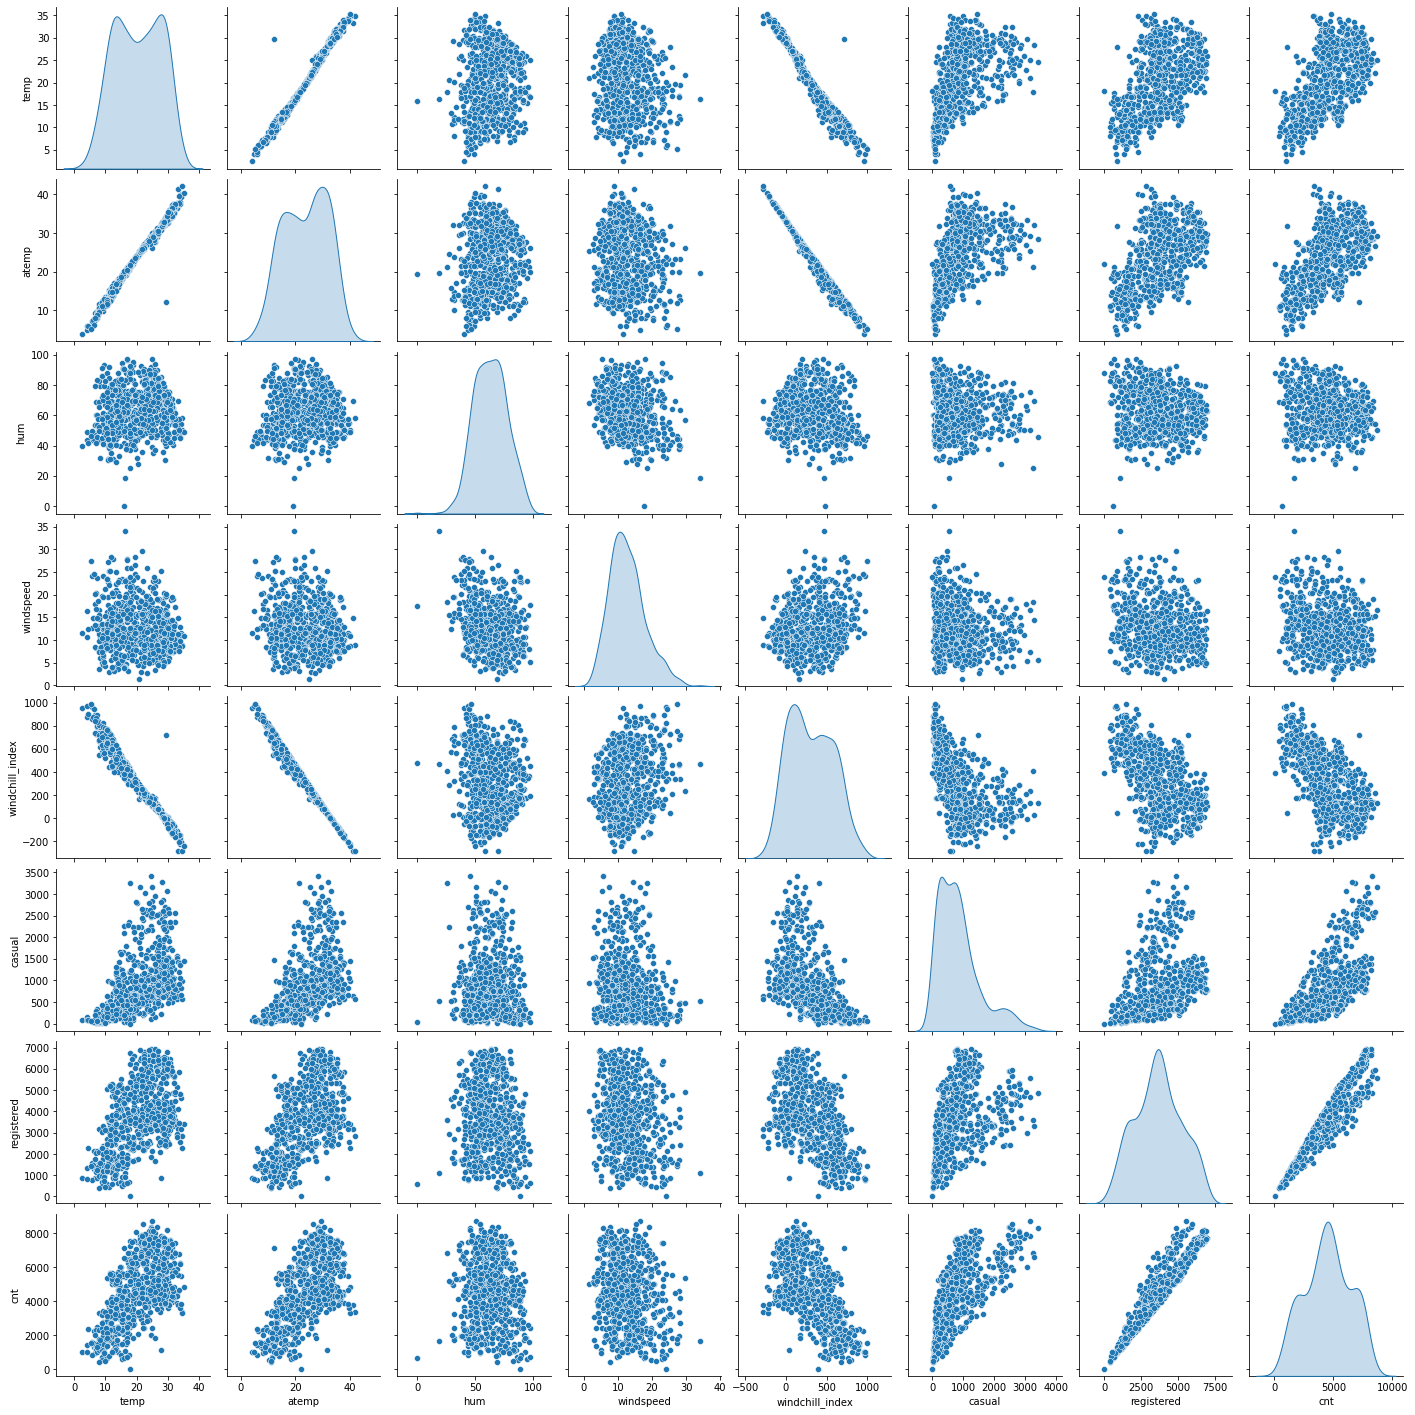

In [46]:
# Create a new dataframe of only numeric variables:

bike_num = data[[ 'temp', 'atemp', 'hum', 'windspeed','windchill_index','casual','registered','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### Observations:
The above Pair-Plot tells us that there is a linear relationship between 'temp','atemp' and 'cnt'

### visualizing categorical variables

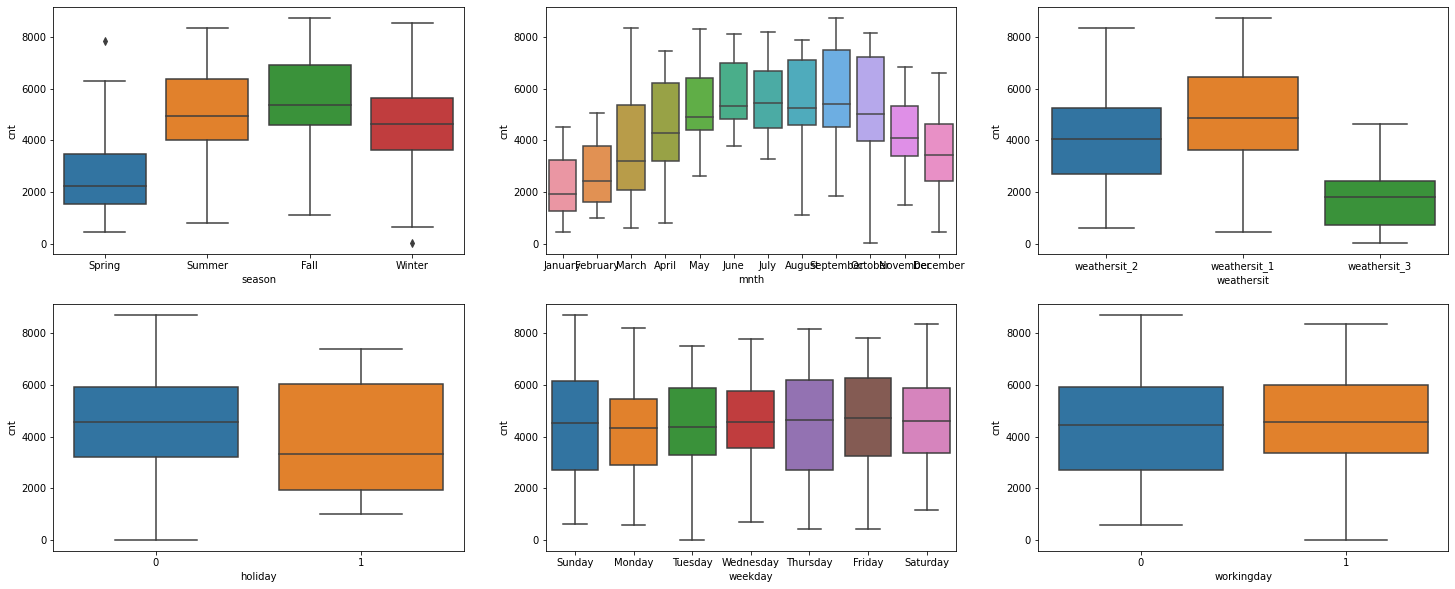

In [47]:
# Build boxplot of all categorical variables (before deleting them after creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

#### Observations
The inference that are derived are:

**season**: Almost 32% of the bike booking were happening in season3 , i.e "Fall" with a median of over 5000 booking (for the period of 2 years). This was followed by "Summer" & "Winter" with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**mnth**: Almost 10% of the bike booking were happening in the months May,June,July,August & September with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

**holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. After different techniques like RFE or analysing p-value and R2, I will drop or keep this column.

**workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Correlation Matrix

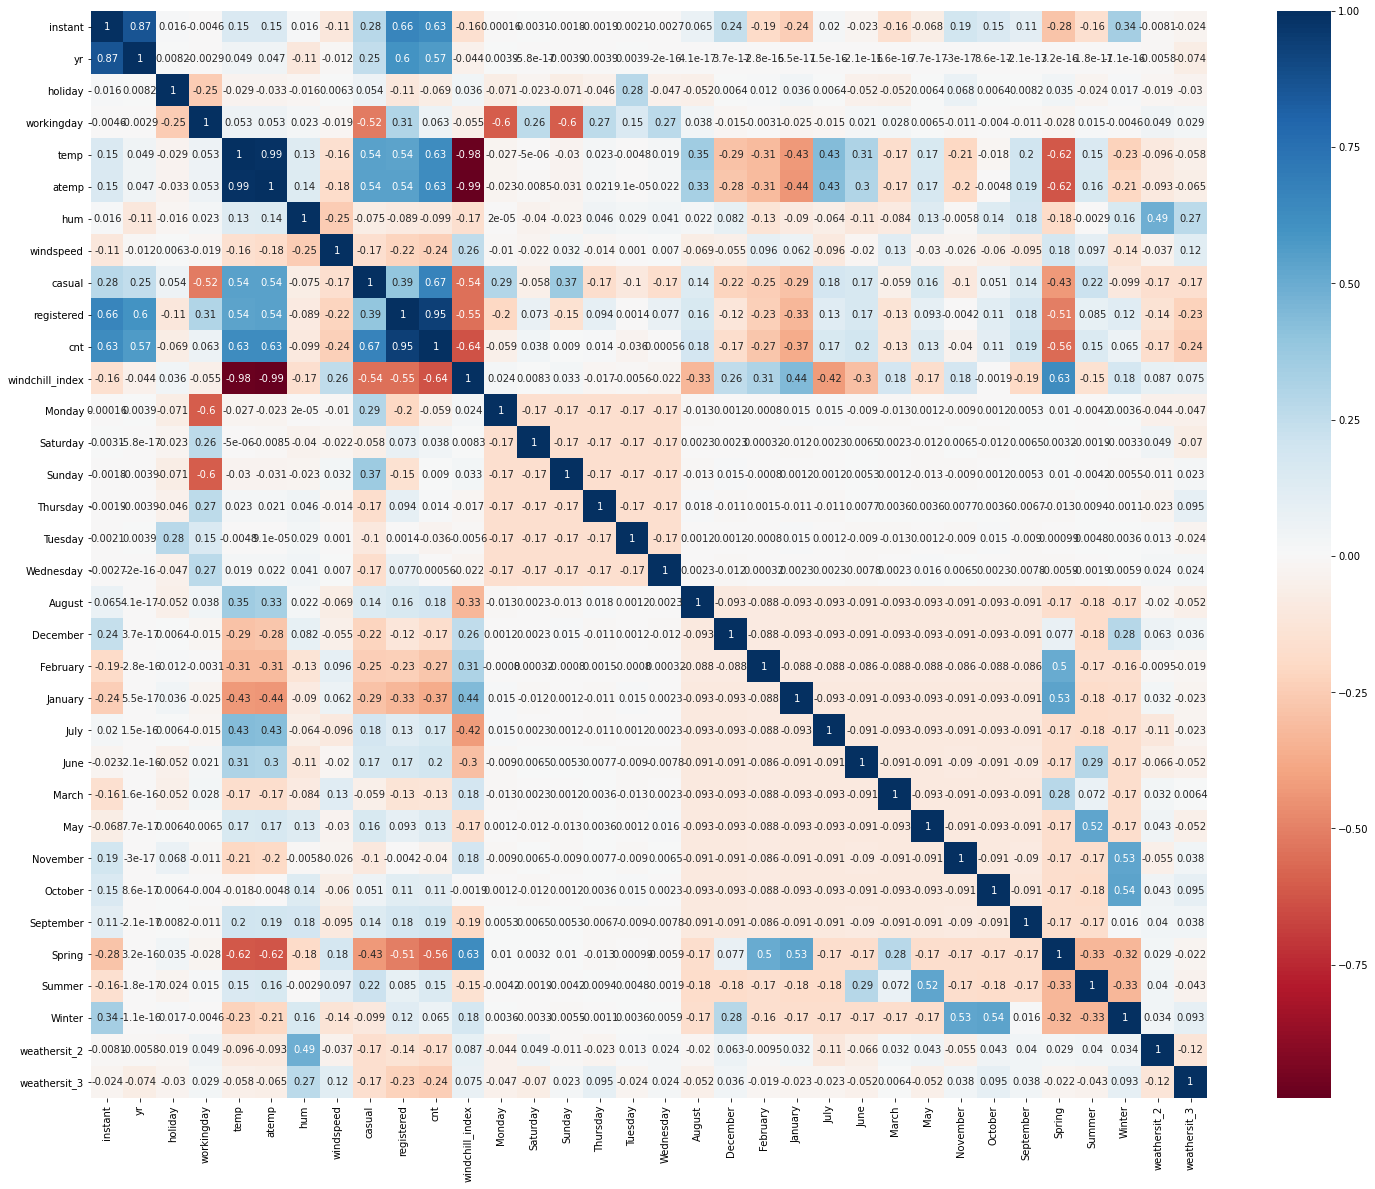

In [48]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot = True, cmap="RdBu")
plt.show()

#### observation
The correlation matrix gave very clear picture of which variables are highly correlated to the target variable but 
after following correct prcedures in step by step, I will choose the significant variable using VIF and p-value

#### since we have already created the dummy variables of the categorical columns: 'season', 'mnth', 'weekday', 'weathersit', so now we can drop these original columns. In addition to it, we will also drop the instant column since its just an index column or may be the id column which doesn't play any role in prediction.

In [49]:
data = data.drop(columns=['season','instant','mnth','weekday','weathersit'])

In [50]:
data.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'windchill_index', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Spring', 'Summer', 'Winter',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [51]:
data.shape

(730, 34)

In [52]:
data.head(5)

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,March,May,November,October,September,Spring,Summer,Winter,weathersit_2,weathersit_3
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,1,0
1,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,0,1,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,1,0,0,0,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,1,0,0,0,0


### Derive sub data from 'dteday' column
we can extract more details from this column like day of the month, year and month. But again since we already have 'year', 'month' column so all we can do is that we can just derive the 'date' from this column and we will try to get insights from this data and see whether this can be further useful or can be dropped easily.

In [53]:
data['date'] = data['dteday'].dt.day

In [54]:
data.date

0       1
1       1
2       1
3       1
4       1
       ..
725    27
726    28
727    29
728    30
729    31
Name: date, Length: 730, dtype: int64

#### now we can drop the 'dteday' column 

In [55]:
data = data.drop(columns = ['dteday'])

In [56]:
data.shape

(730, 34)

In [57]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'windchill_index', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Spring', 'Summer', 'Winter', 'weathersit_2',
       'weathersit_3', 'date'],
      dtype='object')


There's no point in keeping just the date value as a column since its just a redundant and insignificant column 
and I think we cannot use this column for prediction hence I am dropping this column too. There are two more columns if you see, **'casual'** and **'registered'** they are just a data leakage here but I will still keep it and see how significant the model thinks it is for prediction.

In [58]:
data = data.drop(columns =['date'])

### Data prep for modeling : Split the data into training and testing test with ratio 70:30

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_x, test_x = train_test_split(data, train_size = 0.7, random_state = 100)

In [61]:
train_x.shape

(510, 33)

In [62]:
test_x.shape

(220, 33)

In [63]:
train_x

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,March,May,November,October,September,Spring,Summer,Winter,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.14480,70.4167,11.083475,968,6248,7216,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,956,3110,4066,...,1,0,0,0,0,1,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,1120,3100,4220,...,0,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.09770,72.9583,14.707907,177,1506,1683,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,35.35440,65.9583,8.666718,983,6278,7261,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,139,1778,1917,...,0,0,0,0,0,1,0,0,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,275,2464,2739,...,0,0,0,0,0,0,0,1,1,0
79,0,0,1,17.647835,20.48675,73.7391,19.348461,401,1676,2077,...,1,0,0,0,0,0,1,0,1,0


### Data Scaling : using StandardScaler

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','windchill_index','casual','registered','cnt']

train_x[num_vars] = scaler.fit_transform(train_x[num_vars])


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [67]:
train_x

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,March,May,November,October,September,Spring,Summer,Winter,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,1,0,0,0,0,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.298994,0.903552,0.832835,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.041756,0.253826,0.218017,...,0,0,0,0,0,1,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.083206,0.352873,0.312586,...,0,0,0,0,0,0,0,1,1,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0.121609,0.239099,0.236424,...,1,0,0,0,0,0,1,0,1,0


In [68]:
train_x.shape 

(510, 33)

In [69]:
train_y = train_x.pop('cnt')

In [70]:
train_y.shape

(510,)

In [71]:
train_x.shape

(510, 32)

### Modeling and feature analysis and elimination using RFE (Recursive Feature Elimination)

**RFE** is supported by sklearn library so lets build the linear regression model and check the feature this model will support. **Note**: the only drawback of RFE is that we have to pre-define the number of features we need to model. Before proceeding lets take backup of the train data. 

In [113]:
train_data_rfe = train_x
train_label_rfe = train_y

In [114]:
train_data_rfe.shape

(510, 32)

In [115]:
from sklearn.feature_selection import RFE

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lm = LinearRegression()

In [118]:
lm.fit(train_data_rfe,train_label_rfe)

LinearRegression()

In [119]:
rfe = RFE(lm,30)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [120]:
rfe = rfe.fit(train_data_rfe, train_label_rfe)

In [121]:
list(zip(train_data_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('windchill_index', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', True, 1),
 ('Tuesday', False, 3),
 ('Wednesday', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 2),
 ('May', True, 1),
 ('November', True, 1),
 ('October', True, 1),
 ('September', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [122]:
train_data_rfe.columns[~rfe.support_]

Index(['Tuesday', 'March'], dtype='object')

The above value represents the features that are eliminated by the model that should not be used for training.

#### Initial Model

In [123]:
## lets train the initial model using the suggested features by RFE

cols = train_data_rfe.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'windchill_index', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Wednesday', 'August', 'December', 'February',
       'January', 'July', 'June', 'May', 'November', 'October', 'September',
       'Spring', 'Summer', 'Winter', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [124]:
train_data_rfe_selected = train_data_rfe[cols]

In [125]:
train_data_rfe_selected.shape

(510, 30)

In [126]:
import statsmodels.api as sm

In [127]:
x_ = sm.add_constant(train_data_rfe_selected)

In [128]:
lm = sm.OLS(train_label_rfe,x_).fit()

In [129]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.127e+28
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:11:57   Log-Likelihood:                 16125.
No. Observations:                 510   AIC:                        -3.219e+04
Df Residuals:                     480   BIC:                        -3.206e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.573e-15   1.22e-14      0.129      0.898   -2.25e-14    2.56e-14
yr                4.38e-16   7.38e-16      0.593      0.553   -1.01e-15    1.89e-15
holiday          5.378e-16   3.25e-15      0.165      0.869   -5.86e-15    6.93e-15
workingday       4.016e-16   3.06e-15      0.131      0.896   -5.62e-15    6.42e-15
temp             1.388e-16   7.68e-15      0.018      0.986    -1.5e-14    1.52e-14
atemp            1.413e-15   1.89e-14      0.075      0.941   -3.58e-14    3.86e-14
hum               4.17e-16   2.05e-15      0.204      0.839   -3.61e-15    4.44e-15
windspeed       -2.706e-16   2.08e-15     -0.130      0.897   -4.36e-15    3.82e-15
casual              0.3775   2.11e-15   1.79e+14      0.000       0.377       0.377
registered          0.7968    2.5e-15   3.18e+14      0.000       0.797       0.797
windchill_index  1.246e-15   1.59e-14      0.078      0.938   -3.01e-14    3.26e-14
Monday           5.421e-17   3.15e-15      0.017      0.986   -6.14e-15    6.25e-15
Saturday        -2.082e-17   7.14e-16     -0.029      0.977   -1.42e-15    1.38e-15
Sunday           3.995e-16   3.12e-15      0.128      0.898   -5.73e-15    6.53e-15
Thursday         2.975e-16   6.62e-16      0.450      0.653      -1e-15     1.6e-15
Wednesday        2.429e-17   7.02e-16      0.035      0.972   -1.35e-15     1.4e-15
August           2.914e-16   1.67e-15      0.174      0.862      -3e-15    3.58e-15
December         3.973e-16   1.37e-15      0.290      0.772   -2.29e-15    3.08e-15
February         3.643e-17   1.18e-15      0.031      0.975   -2.28e-15    2.35e-15
January          1.405e-16   1.18e-15      0.119      0.905   -2.18e-15    2.46e-15
July             1.735e-16   1.75e-15      0.099      0.921   -3.27e-15    3.61e-15
June              1.18e-16   1.24e-15      0.095      0.924   -2.32e-15    2.56e-15
May             -2.057e-16   1.04e-15     -0.197      0.844   -2.25e-15    1.84e-15
November         3.261e-16   1.61e-15      0.203      0.840   -2.84e-15    3.49e-15
October           4.84e-16   1.61e-15      0.300      0.764   -2.68e-15    3.65e-15
September        1.388e-17   1.54e-15      0.009      0.993   -3.01e-15    3.03e-15
Spring           5.048e-16   1.49e-15      0.338      0.735   -2.43e-15    3.44e-15
Summer           5.482e-16   1.35e-15      0.406      0.685   -2.11e-15     3.2e-15
Winter           1.036e-16   1.47e-15      0.070      0.944   -2.79e-15       3e-15
weathersit_2     3.365e-16   5.66e-16      0.595      0.552   -7.75e-16    1.45e-15
weathersit_3     2.741e-16   1.52e-15      0.180      0.857   -2.71e-15    3.26e-15
==============================================================================
Omnibus:                       11.990   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.002   Jarque-Bera (JB):            

In [130]:
lm.params

const              1.573394e-15
yr                 4.380177e-16
holiday            5.377643e-16
workingday         4.016427e-16
temp               1.387779e-16
atemp              1.412932e-15
hum                4.169842e-16
windspeed         -2.706169e-16
casual             3.774735e-01
registered         7.968247e-01
windchill_index    1.245531e-15
Monday             5.421011e-17
Saturday          -2.081668e-17
Sunday             3.994743e-16
Thursday           2.975051e-16
Wednesday          2.428613e-17
August             2.914335e-16
December           3.972517e-16
February           3.642919e-17
January            1.405126e-16
July               1.734723e-16
June               1.179612e-16
May               -2.057274e-16
November           3.261280e-16
October            4.839878e-16
September          1.387779e-17
Spring             5.048045e-16
Summer             5.481726e-16
Winter             1.036497e-16
weathersit_2       3.365364e-16
weathersit_3       2.740863e-16
dtype: f

### Modeling and feature selection using VIF (Variance Inflation factor)

#### Model 1

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = train_data_rfe_selected.columns
vif['VIF'] = [variance_inflation_factor(train_data_rfe_selected.values, i) for i in range(train_data_rfe_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3741.09
12,Sunday,864.88
10,Monday,802.41
4,atemp,384.28
9,windchill_index,272.40
1,holiday,143.23
3,temp,71.53
25,Spring,9.77
27,Winter,9.63
26,Summer,8.09


In [132]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(train_data_rfe_selected)

# Create a first fitted model
lr1 = sm.OLS(train_label_rfe, X_train_lm1).fit()

In [133]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.127e+28
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:13:05   Log-Likelihood:                 16125.
No. Observations:                 510   AIC:                        -3.219e+04
Df Residuals:                     480   BIC:                        -3.206e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.573e-15   1.22e-14      0.129      0.898   -2.25e-14    2.56e-14
yr                4.38e-16   7.38e-16      0.593      0.553   -1.01e-15    1.89e-15
holiday          5.378e-16   3.25e-15      0.165      0.869   -5.86e-15    6.93e-15
workingday       4.016e-16   3.06e-15      0.131      0.896   -5.62e-15    6.42e-15
temp             1.388e-16   7.68e-15      0.018      0.986    -1.5e-14    1.52e-14
atemp            1.413e-15   1.89e-14      0.075      0.941   -3.58e-14    3.86e-14
hum               4.17e-16   2.05e-15      0.204      0.839   -3.61e-15    4.44e-15
windspeed       -2.706e-16   2.08e-15     -0.130      0.897   -4.36e-15    3.82e-15
casual              0.3775   2.11e-15   1.79e+14      0.000       0.377       0.377
registered          0.7968    2.5e-15   3.18e+14      0.000       0.797       0.797
windchill_index  1.246e-15   1.59e-14      0.078      0.938   -3.01e-14    3.26e-14
Monday           5.421e-17   3.15e-15      0.017      0.986   -6.14e-15    6.25e-15
Saturday        -2.082e-17   7.14e-16     -0.029      0.977   -1.42e-15    1.38e-15
Sunday           3.995e-16   3.12e-15      0.128      0.898   -5.73e-15    6.53e-15
Thursday         2.975e-16   6.62e-16      0.450      0.653      -1e-15     1.6e-15
Wednesday        2.429e-17   7.02e-16      0.035      0.972   -1.35e-15     1.4e-15
August           2.914e-16   1.67e-15      0.174      0.862      -3e-15    3.58e-15
December         3.973e-16   1.37e-15      0.290      0.772   -2.29e-15    3.08e-15
February         3.643e-17   1.18e-15      0.031      0.975   -2.28e-15    2.35e-15
January          1.405e-16   1.18e-15      0.119      0.905   -2.18e-15    2.46e-15
July             1.735e-16   1.75e-15      0.099      0.921   -3.27e-15    3.61e-15
June              1.18e-16   1.24e-15      0.095      0.924   -2.32e-15    2.56e-15
May             -2.057e-16   1.04e-15     -0.197      0.844   -2.25e-15    1.84e-15
November         3.261e-16   1.61e-15      0.203      0.840   -2.84e-15    3.49e-15
October           4.84e-16   1.61e-15      0.300      0.764   -2.68e-15    3.65e-15
September        1.388e-17   1.54e-15      0.009      0.993   -3.01e-15    3.03e-15
Spring           5.048e-16   1.49e-15      0.338      0.735   -2.43e-15    3.44e-15
Summer           5.482e-16   1.35e-15      0.406      0.685   -2.11e-15     3.2e-15
Winter           1.036e-16   1.47e-15      0.070      0.944   -2.79e-15       3e-15
weathersit_2     3.365e-16   5.66e-16      0.595      0.552   -7.75e-16    1.45e-15
weathersit_3     2.741e-16   1.52e-15      0.180      0.857   -2.71e-15    3.26e-15
==============================================================================
Omnibus:                       11.990   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.002   Jarque-Bera (JB):            

Clearly from the above result, we can drop the columns, 'casual', 'registered' first and then see.

In [134]:
train_data_rfe_selected = train_data_rfe_selected.drop(columns = ['casual','registered'],axis=1)

In [135]:
X_train_lm2 = sm.add_constant(train_data_rfe_selected)
lr2 = sm.OLS(train_label_rfe, X_train_lm2).fit()

In [136]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          3.19e-181
Time:                        21:13:26   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     482   BIC:                            -879.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1070      0.234      0.458      0.647      -0.352       0.567
yr                  0.2321      0.008     28.797      0.000       0.216       0.248
holiday            -0.0341      0.062     -0.549      0.583      -0.156       0.088
workingday          0.0557      0.058      0.957      0.339      -0.059       0.170
temp                0.3737      0.145      2.570      0.010       0.088       0.659
atemp               0.2450      0.361      0.678      0.498      -0.465       0.955
hum                -0.1514      0.039     -3.927      0.000      -0.227      -0.076
windspeed          -0.2001      0.039     -5.163      0.000      -0.276      -0.124
windchill_index     0.1714      0.304      0.563      0.574      -0.427       0.769
Monday              0.0154      0.060      0.258      0.796      -0.102       0.133
Saturday            0.0154      0.014      1.133      0.258      -0.011       0.042
Sunday              0.0700      0.059      1.181      0.238      -0.046       0.186
Thursday            0.0091      0.013      0.720      0.472      -0.016       0.034
Wednesday          -0.0034      0.013     -0.253      0.801      -0.030       0.023
August              0.0201      0.032      0.629      0.530      -0.043       0.083
December           -0.0439      0.026     -1.687      0.092      -0.095       0.007
February           -0.0332      0.022     -1.484      0.138      -0.077       0.011
January            -0.0639      0.022     -2.851      0.005      -0.108      -0.020
July               -0.0357      0.033     -1.066      0.287      -0.101       0.030
June                0.0044      0.024      0.188      0.851      -0.042       0.051
May                 0.0247      0.020      1.249      0.212      -0.014       0.064
November           -0.0401      0.031     -1.303      0.193      -0.101       0.020
October             0.0058      0.031      0.188      0.851      -0.055       0.066
September           0.0848      0.029      2.914      0.004       0.028       0.142
Spring             -0.0453      0.028     -1.591      0.112      -0.101       0.011
Summer              0.0415      0.026      1.614      0.107      -0.009       0.092
Winter              0.1074      0.028      3.907      0.000       0.053       0.161
weathersit_2       -0.0600      0.010     -5.736      0.000      -0.081      -0.039
weathersit_3       -0.2552      0.026     -9.629      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       83.005   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.019
Skew:                          -0.792   Prob(JB):                     1.13e-50
Kurtosis:                       5.884   Cond. No.                     3.13e+15


In [137]:
lr2.params

const              0.107014
yr                 0.232127
holiday           -0.034122
workingday         0.055735
temp               0.373682
atemp              0.245034
hum               -0.151436
windspeed         -0.200062
windchill_index    0.171351
Monday             0.015447
Saturday           0.015362
Sunday             0.069954
Thursday           0.009078
Wednesday         -0.003389
August             0.020076
December          -0.043895
February          -0.033206
January           -0.063873
July              -0.035652
June               0.004436
May                0.024727
November          -0.040072
October            0.005794
September          0.084849
Spring            -0.045278
Summer             0.041477
Winter             0.107435
weathersit_2      -0.060034
weathersit_3      -0.255159
dtype: float64

we saw that R2 and adjusted R2 improved a bit but we need to again check the VIF and p-value to eliminate more columns

In [138]:
vif2 = pd.DataFrame()
vif2['Features'] = train_data_rfe_selected.columns
vif2['VIF'] = [variance_inflation_factor(train_data_rfe_selected.values, i) for i in range(train_data_rfe_selected.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
2,workingday,3737.32
10,Sunday,860.64
8,Monday,798.68
4,atemp,382.14
7,windchill_index,271.45
1,holiday,142.84
3,temp,69.98
23,Spring,9.69
25,Winter,9.15
24,Summer,7.99


clearly there are so many columns that shows the negative relationship between the variables, so lets remove the columns with **negative coefficients** and **high VIF value**

In [139]:
cols_to_remove = ['holiday','hum','Wednesday','August','December','January','July','June','November','October']

In [140]:
train_data_rfe_selected = train_data_rfe_selected.drop(columns=cols_to_remove,axis=1)

In [141]:
train_data_rfe_selected.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'windspeed', 'windchill_index',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'February', 'May',
       'September', 'Spring', 'Summer', 'Winter', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

#### Model 3

In [142]:
X_train_lm3 = sm.add_constant(train_data_rfe_selected)
lr3 = sm.OLS(train_label_rfe, X_train_lm3).fit()

In [143]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.33e-182
Time:                        21:16:54   Log-Likelihood:                 506.73
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     491   BIC:                            -895.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2539      0.292     -0.871      0.384      -0.827       0.319
yr                  0.2347      0.008     28.639      0.000       0.219       0.251
workingday          0.0983      0.026      3.736      0.000       0.047       0.150
temp                0.4336      0.142      3.051      0.002       0.154       0.713
atemp               0.4060      0.365      1.111      0.267      -0.312       1.124
windspeed          -0.1840      0.039     -4.689      0.000      -0.261      -0.107
windchill_index     0.3692      0.306      1.205      0.229      -0.233       0.971
Monday              0.0558      0.028      2.015      0.044       0.001       0.110
Saturday            0.0188      0.013      1.432      0.153      -0.007       0.045
Sunday              0.1155      0.028      4.192      0.000       0.061       0.170
Thursday            0.0100      0.012      0.828      0.408      -0.014       0.034
February            0.0080      0.018      0.433      0.665      -0.028       0.044
May                 0.0085      0.018      0.480      0.631      -0.026       0.043
September           0.0887      0.016      5.491      0.000       0.057       0.120
Spring             -0.0583      0.022     -2.707      0.007      -0.101      -0.016
Summer              0.0596      0.016      3.657      0.000       0.028       0.092
Winter              0.0985      0.017      5.731      0.000       0.065       0.132
weathersit_2       -0.0824      0.009     -9.424      0.000      -0.100      -0.065
weathersit_3       -0.2914      0.025    -11.778      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       72.853   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.382
Skew:                          -0.745   Prob(JB):                     1.36e-38
Kurtosis:                       5.447   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 improved to 0.840

In [144]:
lr3.params

const             -0.253877
yr                 0.234702
workingday         0.098289
temp               0.433618
atemp              0.405985
windspeed         -0.183979
windchill_index    0.369150
Monday             0.055806
Saturday           0.018823
Sunday             0.115527
Thursday           0.010030
February           0.007998
May                0.008488
September          0.088690
Spring            -0.058336
Summer             0.059551
Winter             0.098526
weathersit_2      -0.082385
weathersit_3      -0.291389
dtype: float64

There's still negative coefficients for **windspeed**,**windchill_index**, **Spring**, **weathersit_2** and **weathersit_3** but lets first check the VIF value too

In [145]:
vif3 = pd.DataFrame()
vif3['Features'] = train_data_rfe_selected.columns
vif3['VIF'] = [variance_inflation_factor(train_data_rfe_selected.values, i) for i in range(train_data_rfe_selected.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,Features,VIF
3,atemp,416.99
2,temp,399.96
1,workingday,28.32
5,windchill_index,27.23
8,Sunday,7.14
13,Spring,6.86
6,Monday,6.68
4,windspeed,5.77
15,Winter,4.29
14,Summer,3.98


Lets drop **windchill_index** and **atemp** first

In [146]:
train_data_rfe_selected = train_data_rfe_selected.drop(columns=['atemp','windchill_index'],axis=1)

In [147]:
train_data_rfe_selected.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'February', 'May', 'September', 'Spring', 'Summer',
       'Winter', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Model 4

In [148]:
X_train_lm4 = sm.add_constant(train_data_rfe_selected)
lr4 = sm.OLS(train_label_rfe, X_train_lm4).fit()

In [149]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.96e-184
Time:                        21:20:07   Log-Likelihood:                 505.98
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     493   BIC:                            -906.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0944      0.039      2.423      0.016       0.018       0.171
yr               0.2349      0.008     28.691      0.000       0.219       0.251
workingday       0.0977      0.026      3.720      0.000       0.046       0.149
temp             0.4752      0.033     14.289      0.000       0.410       0.541
windspeed       -0.1482      0.025     -5.909      0.000      -0.198      -0.099
Monday           0.0563      0.028      2.035      0.042       0.002       0.111
Saturday         0.0193      0.013      1.478      0.140      -0.006       0.045
Sunday           0.1154      0.028      4.190      0.000       0.061       0.169
Thursday         0.0111      0.012      0.917      0.359      -0.013       0.035
February         0.0074      0.018      0.404      0.687      -0.029       0.044
May              0.0084      0.018      0.478      0.633      -0.026       0.043
September        0.0894      0.016      5.552      0.000       0.058       0.121
Spring          -0.0582      0.021     -2.728      0.007      -0.100      -0.016
Summer           0.0592      0.016      3.707      0.000       0.028       0.091
Winter           0.0961      0.017      5.755      0.000       0.063       0.129
weathersit_2    -0.0820      0.009     -9.390      0.000      -0.099      -0.065
weathersit_3    -0.2901      0.025    -11.763      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       71.828   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.150
Skew:                          -0.736   Prob(JB):                     6.84e-38
Kurtosis:                       5.426   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
lr4.params

const           0.094393
yr              0.234877
workingday      0.097650
temp            0.475236
windspeed      -0.148241
Monday          0.056279
Saturday        0.019285
Sunday          0.115351
Thursday        0.011061
February        0.007442
May             0.008436
September       0.089433
Spring         -0.058240
Summer          0.059203
Winter          0.096127
weathersit_2   -0.081989
weathersit_3   -0.290060
dtype: float64

p-value for **Thursday**, **May** and **February** is still high

In [151]:
vif4 = pd.DataFrame()
vif4['Features'] = train_data_rfe_selected.columns
vif4['VIF'] = [variance_inflation_factor(train_data_rfe_selected.values, i) for i in range(train_data_rfe_selected.shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4

,Features,VIF
1,workingday,16.71
2,temp,12.22
3,windspeed,4.85
6,Sunday,4.48
4,Monday,4.21
11,Spring,4.08
12,Summer,3.06
13,Winter,2.58
0,yr,2.08
14,weathersit_2,1.60


Let's drop **Thursday**, **February** and **May** first

In [154]:
train_data_rfe_selected = train_data_rfe_selected.drop(columns=['Thursday','February','May'],axis=1)

In [155]:
train_data_rfe_selected.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Monday', 'Saturday', 'Sunday',
       'September', 'Spring', 'Summer', 'Winter', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

#### Model 5

In [156]:
X_train_lm5 = sm.add_constant(train_data_rfe_selected)
lr5 = sm.OLS(train_label_rfe, X_train_lm5).fit()

In [157]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.06e-187
Time:                        21:24:36   Log-Likelihood:                 505.34
No. Observations:                 510   AIC:                            -982.7
Df Residuals:                     496   BIC:                            -923.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0919      0.039      2.383      0.018       0.016       0.168
yr               0.2345      0.008     28.760      0.000       0.218       0.251
workingday       0.1004      0.026      3.860      0.000       0.049       0.151
temp             0.4791      0.033     14.716      0.000       0.415       0.543
windspeed       -0.1493      0.025     -5.999      0.000      -0.198      -0.100
Monday           0.0560      0.028      2.029      0.043       0.002       0.110
Saturday         0.0163      0.013      1.294      0.196      -0.008       0.041
Sunday           0.1145      0.027      4.172      0.000       0.061       0.168
September        0.0899      0.016      5.593      0.000       0.058       0.121
Spring          -0.0539      0.021     -2.629      0.009      -0.094      -0.014
Summer           0.0633      0.014      4.508      0.000       0.036       0.091
Winter           0.0975      0.017      5.905      0.000       0.065       0.130
weathersit_2    -0.0816      0.009     -9.392      0.000      -0.099      -0.065
weathersit_3    -0.2885      0.025    -11.749      0.000      -0.337      -0.240
==============================================================================
Omnibus:                       72.507   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.953
Skew:                          -0.746   Prob(JB):                     7.55e-38
Kurtosis:                       5.412   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
lr5.params

const           0.091949
yr              0.234494
workingday      0.100362
temp            0.479076
windspeed      -0.149283
Monday          0.055981
Saturday        0.016295
Sunday          0.114502
September       0.089901
Spring         -0.053930
Summer          0.063278
Winter          0.097467
weathersit_2   -0.081632
weathersit_3   -0.288461
dtype: float64

from model 5 summary, it states that our coefficients are not equal to zerowhich means that we REJECT the NULL Hypothesis

### F- Statistics

**F-Statistics** is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

**F-statistic**: 199.5
Prob (F-statistic): 2.06e-187
The F-Statistics value of 199.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### Equation of Best-Fitted Line

const = 0.091949 + (0.234494 * yr) + (0.100362 * workingday) + (0.479076 * temp) + (-0.149283 * windspeed) + (0.055981 * Monday) + (0.016295 * Saturday) + (0.114502 * Sunday) + (0.089901 * September) + (-0.053930 * Spring) + (0.063278 * Summer) + (0.097467 * Winter) + (-0.081632 * weathersit_2) + (-0.288461 * weathersit_3)

In [160]:
y_train_pred = lr5.predict(X_train_lm5)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

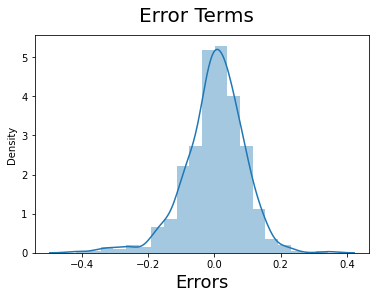

In [161]:
res = train_label_rfe - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_ = pd.DataFrame()
vif_['Features'] = X_train_lm5.columns
vif_['VIF'] = [variance_inflation_factor(X_train_lm5.values, i) for i in range(X_train_lm5.shape[1])]
vif_['VIF'] = round(vif_['VIF'], 2)
vif_ = vif_.sort_values(by = "VIF", ascending = False)
vif_

,Features,VIF
0,const,91.47
2,workingday,9.10
7,Sunday,6.06
5,Monday,5.74
9,Spring,4.76
3,temp,3.32
11,Winter,3.11
10,Summer,2.25
8,September,1.17
4,windspeed,1.10


### Insights

From the above histogram, we could see that the Residuals are normally distributed and VIF value is not greater than 10 which tells that there is no multicollinearity in model. Hence our assumption for Linear Regression is valid.

### Prediction on Test data


In [162]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.


num_vars = ['temp', 'atemp', 'hum', 'windspeed','windchill_index','casual','registered','cnt']

test_x[num_vars] = scaler.transform(test_x[num_vars])


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [163]:
test_x.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,March,May,November,October,September,Spring,Summer,Winter,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,0,1,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,0,0,0,1,0,0,0


In [164]:
test_y = test_x.pop('cnt')
test_x.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'windchill_index', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Spring', 'Summer', 'Winter', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

now select the columns that were in final linear regression model

In [165]:
cols = train_data_rfe_selected.columns

In [166]:
cols

Index(['yr', 'workingday', 'temp', 'windspeed', 'Monday', 'Saturday', 'Sunday',
       'September', 'Spring', 'Summer', 'Winter', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [167]:
test_x = test_x[cols]
# Adding constant variable to test dataframe
test_x_lm5 = sm.add_constant(test_x)
test_x_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   Monday        220 non-null    uint8  
 6   Saturday      220 non-null    uint8  
 7   Sunday        220 non-null    uint8  
 8   September     220 non-null    uint8  
 9   Spring        220 non-null    uint8  
 10  Summer        220 non-null    uint8  
 11  Winter        220 non-null    uint8  
 12  weathersit_2  220 non-null    uint8  
 13  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(9)
memory usage: 12.2 KB


In [168]:
y_pred_test = lr5.predict(test_x_lm5)

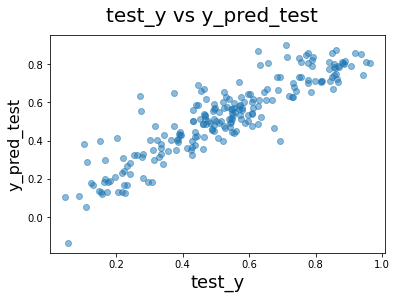

In [169]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(test_y, y_pred_test, alpha=.5)
fig.suptitle('test_y vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('test_y', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16) 
plt.show()

### R2 value using metrics

In [170]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred_test)

0.8068472233891606

In [175]:
r2_score = 0.8068472233891606
# n is number of rows in X
n = test_x_lm5.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = test_x_lm5.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7936563020596399

#### Final Result Comparison

Train R-square :0.839
Train Adjusted R-square :0.835
Test R-square :0.806
Test Adjusted R-square :0.7936

This seems to be a good model that can very well 'Generalize' various datasets.

#### Submitted By: Shruti Sneha